In [45]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(1234)

# Generate an ensemble of drunken sailors in 2D

In [46]:
n_walks = 1000
n_steps = 10000

dirs = rng.choice([0, 1, 2, 3], size=(n_walks, n_steps))

In [47]:
dx = np.zeros((n_walks, n_steps), dtype=int)
dy = np.zeros((n_walks, n_steps), dtype=int)

In [48]:
dx[dirs == 0] = 1
dx[dirs == 2] = -1

dy[dirs == 1] = 1
dy[dirs == 3] = -1

In [49]:
x = dx.cumsum(axis=1)[:, -1]
y = dy.cumsum(axis=1)[:, -1]

# A single component

In [57]:
xs = x.copy()
xs.sort()

xs = xs[xs >= 0]
bx = np.bincount(xs)

In [58]:
bx.shape

(102,)

In [59]:
bx

array([1780, 1769, 1778, 1674, 1828, 1689, 1695, 1699, 1647, 1600, 1614,
       1583, 1564, 1583, 1465, 1413, 1399, 1331, 1300, 1277, 1170, 1215,
       1141, 1017, 1006,  897,  925,  857,  776,  775,  717,  679,  651,
        608,  560,  563,  501,  459,  441,  376,  393,  346,  305,  279,
        229,  251,  203,  199,  184,  166,  152,  148,  126,  105,   90,
         81,   84,   74,   78,   59,   50,   30,   34,   32,   25,   21,
         23,   22,   12,   14,   15,    9,    9,    5,    9,    7,   11,
          2,    8,    5,    2,    2,    1,    1,    1,    2,    0,    4,
          1,    2,    1,    1,    0,    2,    0,    0,    1,    0,    0,
          0,    0,    1])

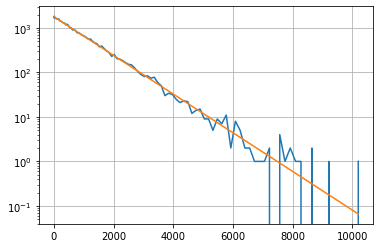

In [66]:
xvals = np.arange(bx.shape[0])
plt.semilogy(xvals**2, bx)
plt.semilogy(xvals**2, bx[0]*np.exp(-xvals**2 / n_steps))
plt.grid(True)

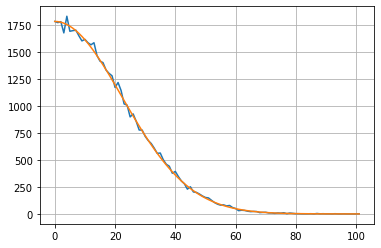

In [85]:
xvals = np.arange(bx.shape[0])
plt.plot(xvals, bx)
plt.plot(xvals, bx[0]*np.exp(-xvals**2 / n_steps))
plt.grid(True)

### The moments of the gaussian distribution

In [93]:
xvals

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101])

In [106]:
m2g = np.sum( xvals**2 * np.exp(-xvals**2 / n_steps)) / np.sqrt(2 * np.pi) / np.sqrt(n_steps / 2)
m4g = np.sum( xvals**4 * np.exp(-xvals**2 / n_steps)) / np.sqrt(2 * np.pi) / np.sqrt(n_steps / 2)

In [108]:
# The Gaussian value is 3, here we use only x>0, hence extra (1/2) / (1/2)**2 = 2

m4g / m2g**2

5.995758152225855

In [116]:
# the `bx` array is normalized to bx[0], so the Binder ratio (aka kurtosis) needs to be scaled by `bx[0]`

m2 = (xvals**2 * bx).sum()
m4 = (xvals**4 * bx).sum()

m4 / m2**2 *bx[0] * (np.sqrt(2 * np.pi) * np.sqrt(n_steps / 2))

5.978535935843419

# The distribution of $R^2$

In [117]:
r2 = x**2 + y**2
r2.sort()

bc = np.bincount(r2)

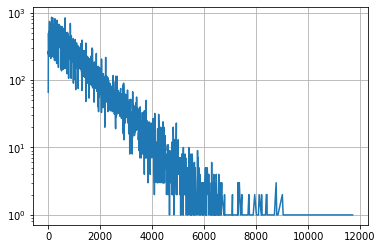

In [118]:
mask = bc != 0

plt.semilogy(mask.nonzero()[0], bc[mask])
plt.grid(True)

In [119]:
r, = mask.nonzero()

<ipython-input-120-a7c5d5c216cf>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(r, bc[mask] / np.sqrt(r), '.')


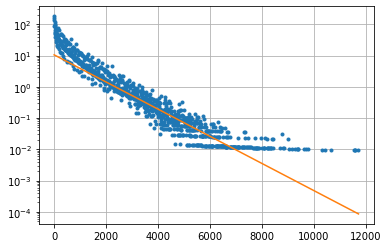

In [120]:
plt.semilogy(r, bc[mask] / np.sqrt(r), '.')
plt.semilogy(r, bc[0] * np.exp(-r/n_steps) / 2 / np.pi)
plt.grid(True)

In [124]:
bc[mask].shape

(1041,)

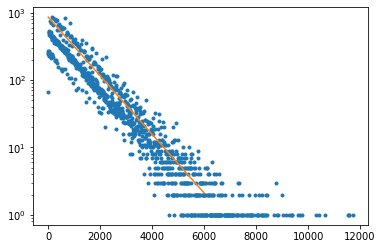

In [144]:
mask = bc !=0

r2vals = np.arange(bc.shape[0])[mask]
bcvals = bc[mask]

plt.semilogy(r2vals, bcvals, '.')

mmm = r2vals < 6000
plt.semilogy(r2vals[mmm], bcvals.max() * np.exp(-r2vals[mmm] / n_steps))

In [132]:
bc.shape

(11715,)

# Number of neighbors

In [50]:
walks_x = dx.cumsum(axis=1)
walks_y = dy.cumsum(axis=1)

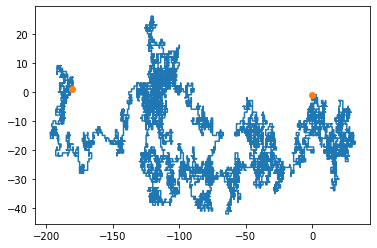

In [51]:
plt.plot(walks_x[0], walks_y[0], '-')
plt.plot(walks_x[0][0], walks_y[0][0], 'o')
plt.plot(walks_x[0][-1], walks_y[0][-1], 'o', c='C1')

In [52]:
neighbs = np.zeros((5, n_walks), dtype=float)
lengths = np.zeros(n_walks)

for j in range(n_walks):

    if j%100 == 0:
        print('.', end='')
    
    coords = list((x, y) for x, y in zip(walks_x[j], walks_y[j]))
    unique_coords = set(coords)

    nums = []

    for site in coords:
        num = 0
        x, y = site
        for delta in ((-1, 0), (1, 0), (0, -1), (0, 1)):
            if (x+delta[0], y+delta[1]) in unique_coords:
                num += 1
        nums += [num]
    
    lengths[j] = len(unique_coords)
    for i in (2, 3, 4):
        neighbs[i, j] = sum(num == i for num in nums) / len(coords)

..........

In [40]:
lengths.mean(), lengths.std()

(1532.9791, 176.76973684200019)

In [43]:
neighbs.mean(axis=1)

array([0.        , 0.        , 0.0733689 , 0.20135174, 0.71691368])

In [42]:
neighbs.std(axis=1)

array([0.        , 0.        , 0.0191109 , 0.03785745, 0.05765879])

In [37]:
nums = []

for site in coords:
    num = 0
    x, y = site
    for delta in ((-1, 0), (1, 0), (0, -1), (0, 1)):
        if (x+delta[0], y+delta[1]) in unique_coords:
            num += 1
    nums += [num]

In [40]:
n2 = sum(num == 2 for num in nums)
n3 = sum(num == 3 for num in nums)
n4 = sum(num == 4 for num in nums)

[0.152, 0.302, 0.53]